# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how= "right")
selected_columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
                    'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

# Display the data table for preview
mouse_dataset = combined_mouse_data_df[selected_columns]
mouse_dataset.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combined_mouse_data_df["Mouse ID"].nunique()
print(mouse_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_dataset[combined_mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Assuming combined_mouse_data_df is your DataFrame
clean_mouse_df = mouse_dataset[mouse_dataset["Mouse ID"].isin(duplicate_mice_ids)==False]
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df_count = clean_mouse_df["Mouse ID"].nunique()
clean_mouse_df_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

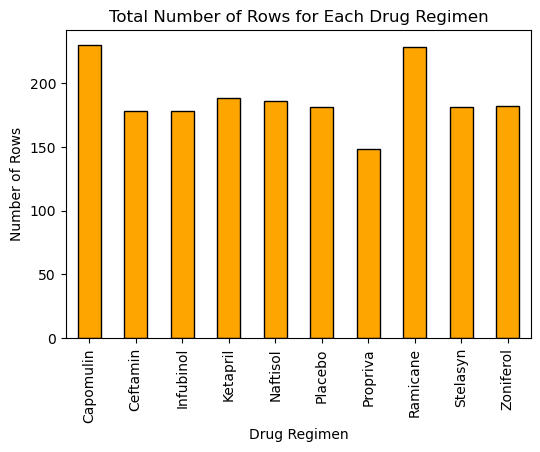

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
counts = clean_mouse_df.groupby('Drug Regimen').size()

# Plot the bar plot
counts.plot(kind='bar', figsize=(6, 4), color='orange', edgecolor='black')

# Add labels and title
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Show the plot
plt.show()

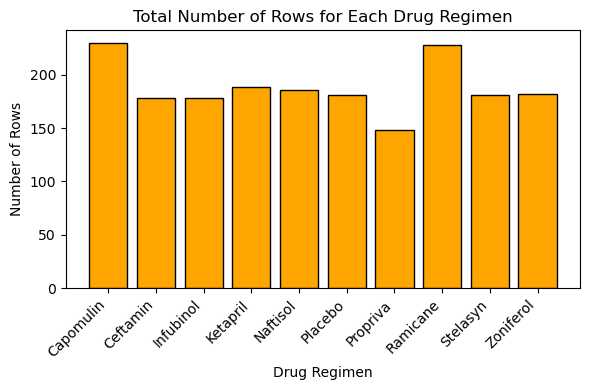

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
counts = clean_mouse_df.groupby('Drug Regimen').size()

# Extracting data for plotting
drug_regimens = counts.index
count_values = counts.values

# Plot the bar plot using pyplot
plt.figure(figsize=(6, 4))
plt.bar(drug_regimens, count_values, color='orange', edgecolor='black')

# Add labels and title
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

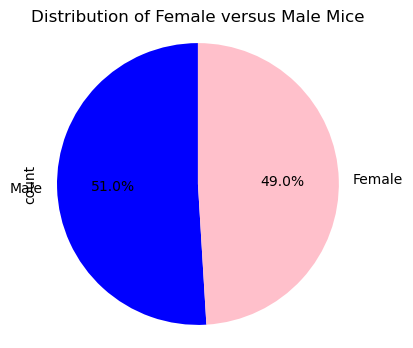

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_counts = clean_mouse_df['Sex'].value_counts()

# Plot the pie plot using Pandas
gender_counts.plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

# Add title
plt.title("Distribution of Female versus Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()

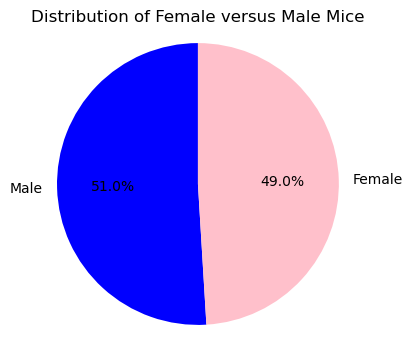

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_counts = clean_mouse_df['Sex'].value_counts()

# Plot the pie plot using pyplot
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

# Add title
plt.title("Distribution of Female versus Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Filter the DataFrame for the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_mouse_df[clean_mouse_df['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')

# Now merged_df contains the final tumor volume of each mouse for the specified treatment regimens
# You can access this information from the DataFrame
tumor_volume = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Print or use final_tumor_volumes as needed
print(tumor_volume)

   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the DataFrame for the current treatment
    treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    
    # Get tumor volume data for the current treatment
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine upper and lower bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Locate potential outliers
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print information about outliers
    if len(outliers) > 0:
        print(f"Potential outliers for {treatment}:")
        print(outliers)
    else:
        print(f"No potential outliers for {treatment}")

No potential outliers for Capomulin
No potential outliers for Ramicane
Potential outliers for Infubinol:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
No potential outliers for Ceftamin


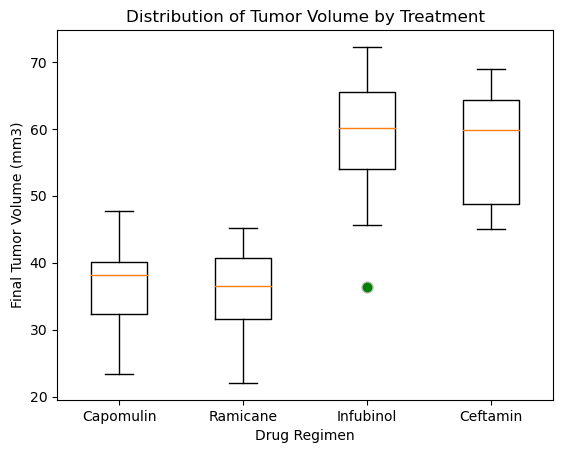

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
flierprops = dict(marker = "o", markerfacecolor = "green", markersize = 8, markeredgecolor = "silver")

ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Distribution of Tumor Volume by Treatment")
ax1.boxplot(tumor_vol_data, labels = treatments, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

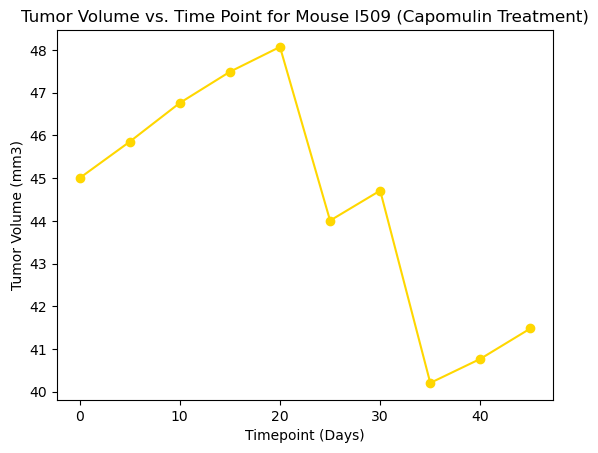

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

# Filter the DataFrame for Capomulin treatment and the chosen mouse
capomulin_df = clean_mouse_df[(clean_mouse_df["Drug Regimen"] == "Capomulin") & (clean_mouse_df["Mouse ID"] == mouse_id)]

# Plot tumor volume vs. time point
plt.plot(capomulin_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"], marker='o', color="gold")

# Add labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')

# Display the plot
plt.show()

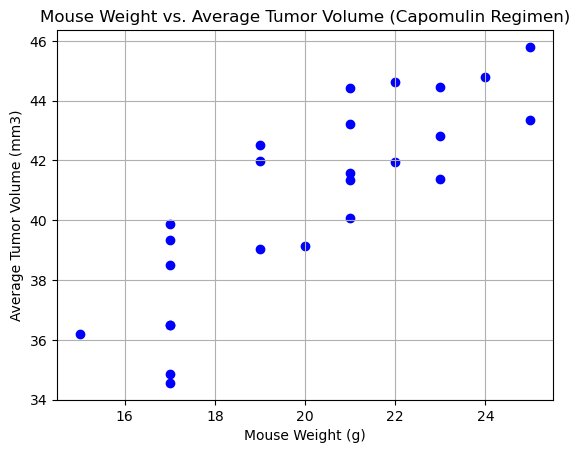

In [23]:
capomulin_df = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weights for each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Reset index
average_tumor_volume = average_tumor_volume.reset_index(drop=True)
mouse_weight = mouse_weight.reset_index(drop=True)

# Create a scatter plot of mouse weight vs. average observed tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="b")

# Adding the x,y labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient 0.8419363424694722
Slope 0.9544396890241049
Intercept 21.552160532685008


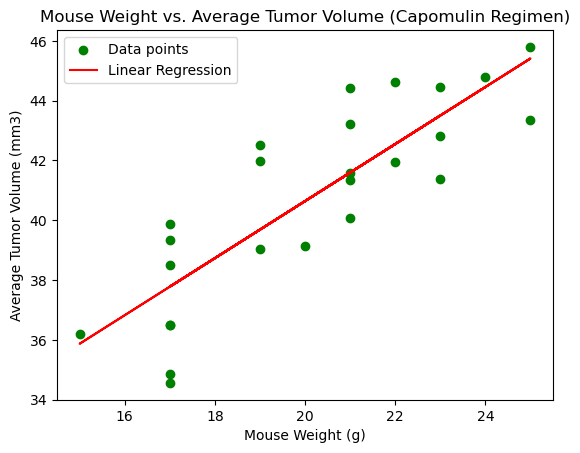

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Created the coefficient and used linregress for the slope, and the regression
correlation_coefficient = mouse_weight.corr(average_tumor_volume)
slope, intercept, r_value, p_value, std_error = linregress(mouse_weight, average_tumor_volume)
print("Correlation Coefficient", correlation_coefficient)
print("Slope", slope)
print("Intercept", intercept)

#Created a scatterplot with the info
plt.scatter(mouse_weight, average_tumor_volume, marker = 'o', color = 'green', label = "Data points")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color = 'red', label = "Linear Regression")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.legend()

plt.show()